# 利得構造が変動する場合の分析

In [1]:
# Graph
using Graphs
using SimpleWeightedGraphs

# Plot
using Cairo
using Colors: distinguishable_colors, @colorant_str
using Compose
using Fontconfig
using GraphPlot: gplot, spring_layout
using Plots: Plot, plot, plot!, savefig, twinx, PlotMeasures

# Misc
using DataFrames: DataFrame
using StatsBase: mean
using Random: MersenneTwister

# Original modules
include("../src/Simulation.jl")
include("../src/SimPlot.jl")
using .Simulation
using .SimPlot

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [2]:
function make_variability(μ::Float64, a::Float64, b::Int, generations::Int)::Vector{Float64}
    result = Vector{Float64}()
    value = μ

    for g in 1:generations
        if 0 <= g % (b * 8) <= b || b * 4 + 1 < g % (b * 8) <= b * 5
            value = μ
            push!(result, value)
        elseif b < g % (b * 8) <= b * 2 + 1 || b * 7 < g % (b * 8) <= b * 8
            value += a / (b + 1)
            push!(result, value)
        elseif b * 2 + 1 < g % (b * 8) <= b * 3 || b * 6 + 1 < g % (b * 8) <= b * 7
            push!(result, value)
        elseif b * 3 < g % (b * 8) <= b * 4 + 1 || b * 5 < g % (b * 8) <= b * 6 + 1
            value -= a / (b + 1)
            push!(result, value)
        end
    end
    
    return result
end;

In [3]:
function plot_output_df1(df::DataFrame, skip::Int = 10)::Plot
    p1 = plot(
        title = "Cooperation",
        xl = "Generation",
        xlim = (0, 1000),
        xticks = 0:50:1000,
        size = (1200, 300),
        left_margin = 6 * PlotMeasures.mm,
        right_margin = 6 * PlotMeasures.mm,
        bottom_margin = 6 * PlotMeasures.mm
    )
    plot!(df.generation, df.cooperation_rate, label = false, lc = :blue, ylim = (0, 1), yl = "Frequency of Cooperator")
    plot!(twinx(), df.generation, df.T, xlim = (0, 1000), label = false, lc = :red, yl = "T")
    display(p1)

    params1 = join(["$(k) = $(v)" for (k, v) in pairs(df[1, [2, 3, 10, 11]])], ", ")
    params2 = join(["$(k) = $(v)" for (k, v) in pairs(df[1, 4:9])], ", ")

    return plot(
        SimPlot.plot_network_attributes(df, "weak", skip),
        SimPlot.plot_component_attributes(df, "weak", 1, skip),
        SimPlot.plot_component_attributes(df, "weak", 2, skip),
        SimPlot.plot_network_attributes(df, "medium", skip),
        SimPlot.plot_component_attributes(df, "medium", 1, skip),
        SimPlot.plot_component_attributes(df, "medium", 2, skip),
        SimPlot.plot_network_attributes(df, "strong", skip),
        SimPlot.plot_component_attributes(df, "strong", 1, skip),
        SimPlot.plot_component_attributes(df, "strong", 2, skip),
        layout = (3, 3),
        size = (1200, 1200),
        bottom_margin = 6 * PlotMeasures.mm,
        suptitle = "$(params1)\n$(params2)",
        plot_titlefontsize = 10,
    )
end

function plot_output_df2(df::DataFrame, skip::Int = 10)::Plot
    params1 = join(["$(k) = $(v)" for (k, v) in pairs(df[1, [2, 3, 10, 11]])], ", ")
    params2 = join(["$(k) = $(v)" for (k, v) in pairs(df[1, 4:9])], ", ")

    p1 = plot(
        title = "Cooperation and Environmental Variability",
        xl = "Generation",
        xlim = (0, 1000),
        xticks = 0:50:1000,
        size = (1200, 300),
        left_margin = 6 * PlotMeasures.mm,
        right_margin = 6 * PlotMeasures.mm,
        bottom_margin = 6 * PlotMeasures.mm
    )
    plot!(df.generation, df.cooperation_rate, label = false, lc = :blue, ylim = (0, 1), yl = "Frequency of Cooperator")
    plot!(twinx(), df.generation, df.T, xlim = (0, 1000), label = false, lc = :red, yl = "T")

    return plot(
        p1,
        SimPlot.plot_network_attributes(df, "strong", skip),
        SimPlot.plot_network_attributes(df, "medium", skip),
        SimPlot.plot_network_attributes(df, "weak", skip),
        layout = (4, 1),
        size = (1200, 1200),
        bottom_margin = 6 * PlotMeasures.mm,
        suptitle = "$(params1)\n$(params2)",
        plot_titlefontsize = 10,
    )
end

make_payoff_table(T::Float64, S::Float64)::Dict = Dict((C, C) => (1.0, 1.0), (C, D) => (S, T), (D, C) => (T, S), (D, D) => (0, 0));

In [ ]:
param = Param(
    initial_N = 1000,
    initial_k = 100,
    initial_w = 0.2,
    initial_T = 1.15,
    S = -0.1,
    δ = 1.0,
    β = 0.2,
    sigma = 100,
    initial_μ_s = 0.01,
    initial_μ_c = 0.01,
    generations = 1000,
    variability_mode = POPULATION,
    rng = MersenneTwister(1),
)

model = Model(param)
output_df = Simulation.make_output_df(param)

for generation = 1:(param.generations)
    generation % 10 == 0 && @show generation, nv(model.graph)
    model.generation = generation
    model.payoff_vec .= 0.0

    interaction!(model)
    death!(model, param.rng)
    birth!(model, param.rng)

    log!(output_df, model, 1)
end

output_df

(generation, nv(model.graph)) = (10, 1017)
(generation, nv(model.graph)) = (20, 974)
(generation, nv(model.graph)) = (30, 864)
(generation, nv(model.graph)) = (40, 923)
(generation, nv(model.graph)) = (50, 897)
(generation, nv(model.graph)) = (60, 865)
(generation, nv(model.graph)) = (70, 854)
(generation, nv(model.graph)) = (80, 1250)
(generation, nv(model.graph)) = (90, 1038)
(generation, nv(model.graph)) = (100, 813)
(generation, nv(model.graph)) = (110, 971)
(generation, nv(model.graph)) = (120, 855)
(generation, nv(model.graph)) = (130, 896)
(generation, nv(model.graph)) = (140, 1111)


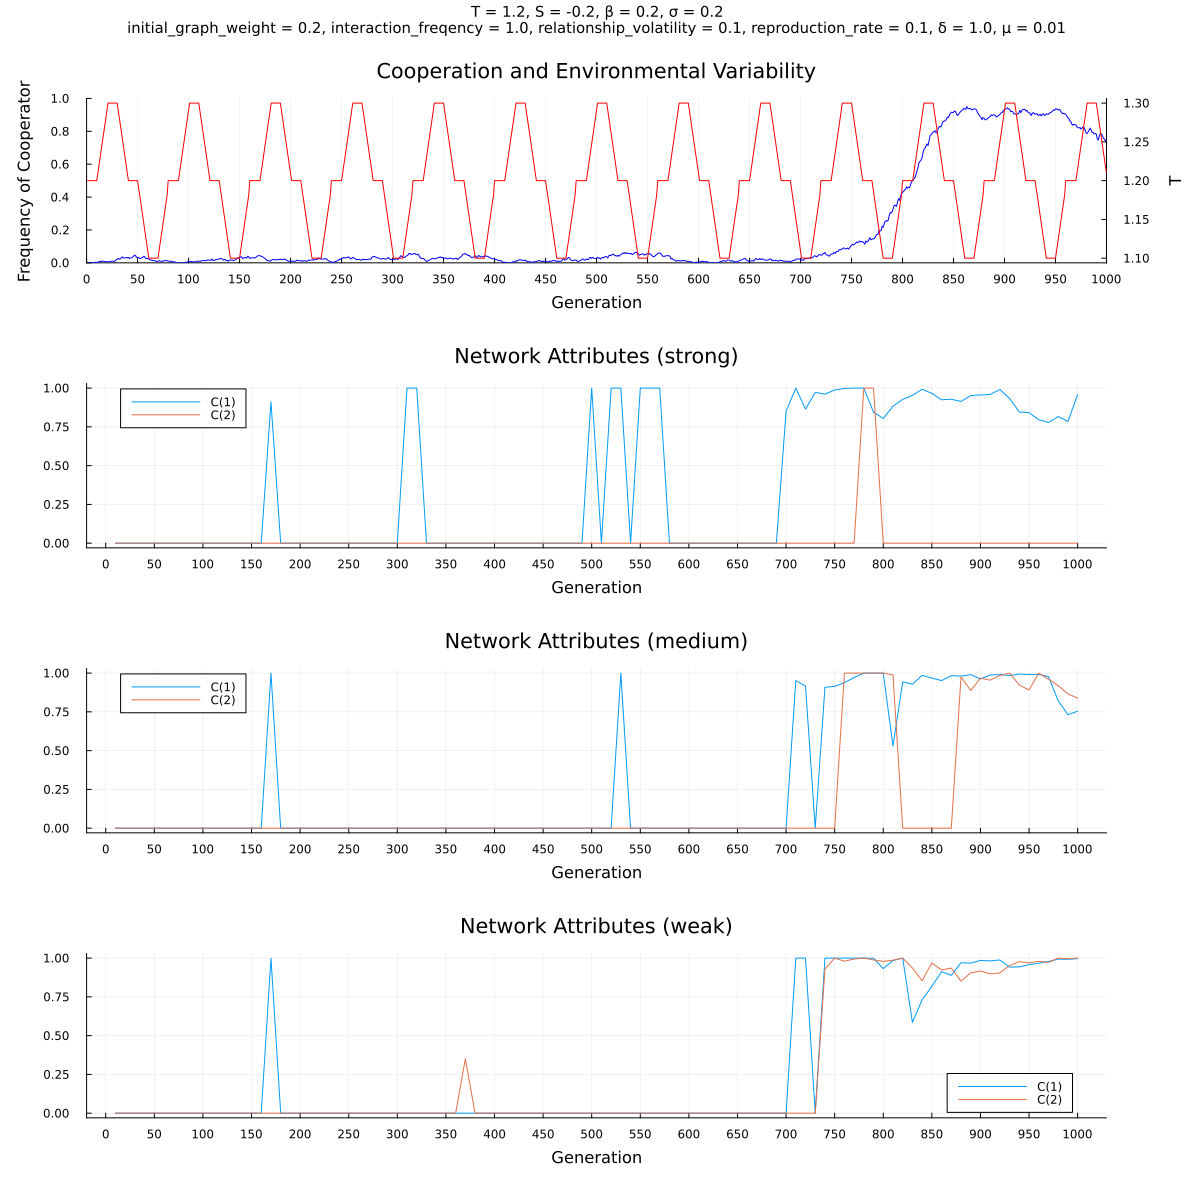

In [5]:
p = plot_output_df2(output_df)
# savefig(p, "2.png")
display(p)

第1000世代
協力率: 0.75
弱い繋がりグループ: 8個, [140, 122, 8, 21, 3, 4, 1, 1]
中程度の繋がりグループ: 15個, [139, 93, 8, 6, 5, 14, 3, 6, 1, 7, 8, 4, 4, 1, 1]
強い繋がりグループ: 91個, [2, 1, 1, 4, 14, 2, 2, 10, 1, 1, 3, 2, 4, 2, 15, 4, 1, 5, 6, 1, 5, 9, 2, 2, 1, 2, 6, 4, 2, 2, 3, 2, 2, 1, 8, 4, 1, 1, 4, 1, 5, 2, 3, 1, 9, 7, 5, 3, 3, 5, 2, 4, 1, 1, 2, 2, 4, 3, 4, 1, 2, 8, 3, 3, 10, 1, 4, 7, 5, 1, 2, 1, 4, 1, 4, 8, 1, 2, 3, 1, 1, 2, 1, 2, 2, 4, 1, 1, 2, 1, 2]
弱い繋がりグループ: 41個, [139, 122, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
中程度の繋がりグループ: 295個, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

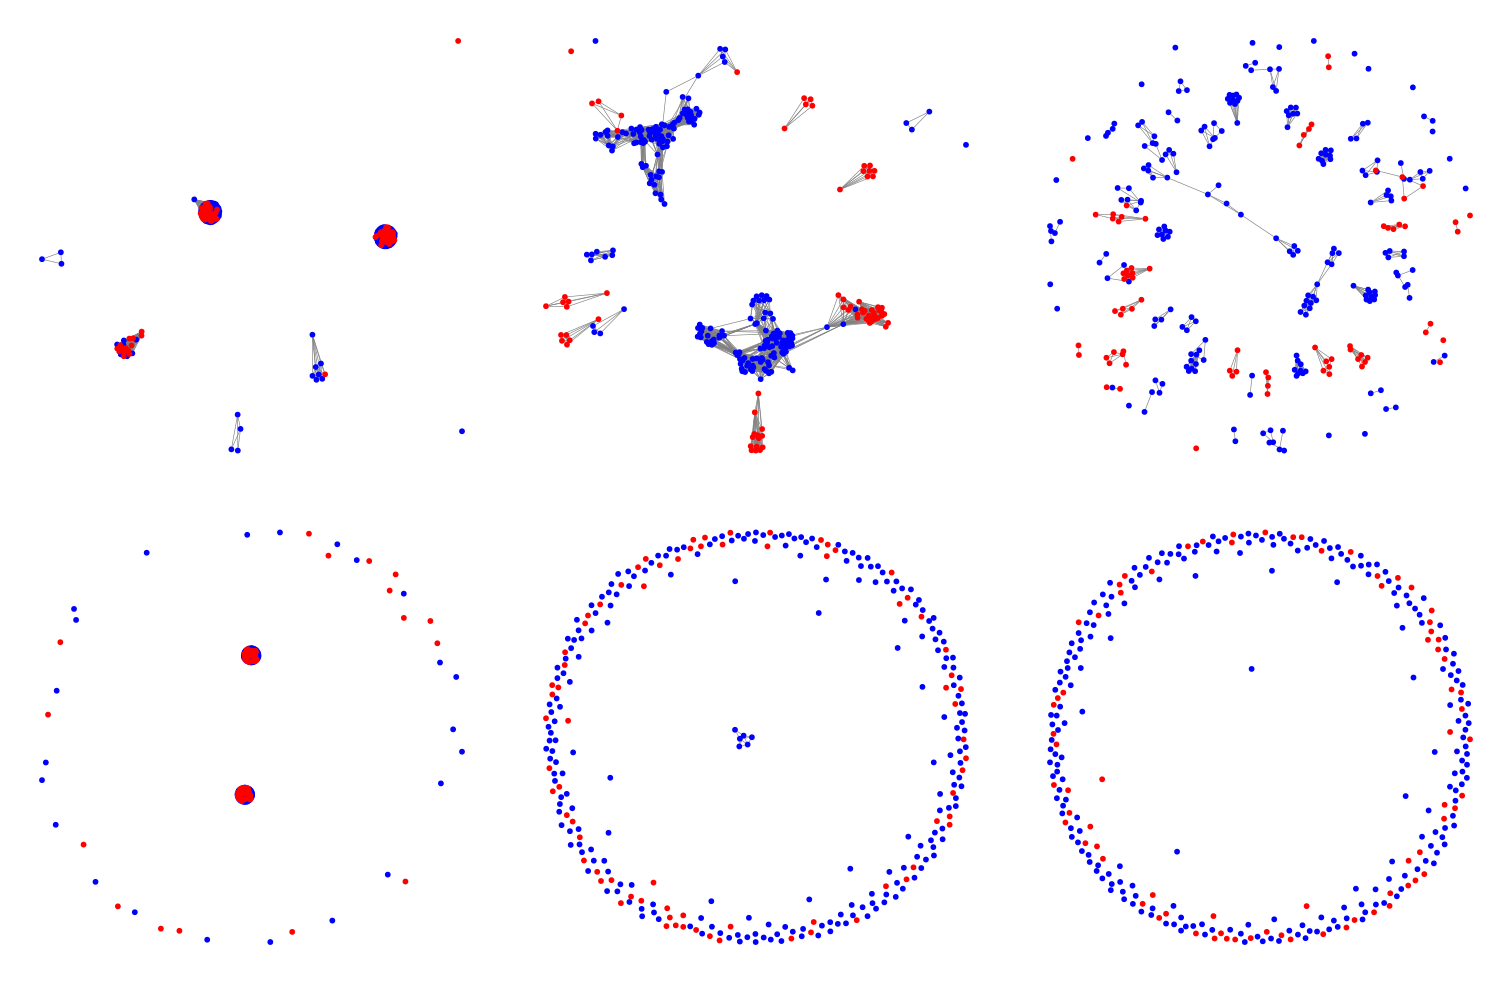

false

In [7]:
set_default_graphic_size(24cm, 8cm)

i = 1000

color_val_vec = [s == C ? colorant"blue" : colorant"red" for s in strategy_vec_vec[i]]
g25 = SimpleGraph(graph_weights_vec[i] .>= Output.WEAK_THRESHOLD)
g50 = SimpleGraph(graph_weights_vec[i] .>= Output.MEDIUM_THRESHOLD)
g75 = SimpleGraph(graph_weights_vec[i] .>= Output.STRONG_THRESHOLD)

println("第$(i)世代")
println("協力率: $(mean(strategy_vec_vec[i] .== C))")
g25_components = [length(c) for c in connected_components(g25)]
g50_components = [length(c) for c in connected_components(g50)]
g75_components = [length(c) for c in connected_components(g75)]
println("弱い繋がりグループ: $(length(g25_components))個, $(g25_components)")
println("中程度の繋がりグループ: $(length(g50_components))個, $(g50_components)")
println("強い繋がりグループ: $(length(g75_components))個, $(g75_components)")

p1 = hstack(
    gplot(g25, nodefillc=color_val_vec, edgestrokec = colorant"gray", spring_layout(g25, C = 4.0)...),
    gplot(g50, nodefillc=color_val_vec, edgestrokec = colorant"gray", spring_layout(g50, C = 4.0)...),
    gplot(g75, nodefillc=color_val_vec, edgestrokec = colorant"gray", spring_layout(g75, C = 4.0)...)
)

N = size(graph_weights_vec[i], 1)
initial_graph_weight = 0.2
graph_weights = Output.convert_to_2nd_order_weights(graph_weights_vec[i], N, initial_graph_weight)
Simulation.normalize_graph_weights!(graph_weights, N, initial_graph_weight)
g25 = SimpleGraph(graph_weights .>= Output.WEAK_THRESHOLD)
g50 = SimpleGraph(graph_weights .>= Output.MEDIUM_THRESHOLD)
g75 = SimpleGraph(graph_weights .>= Output.STRONG_THRESHOLD)
g25_components = [length(c) for c in connected_components(g25)]
g50_components = [length(c) for c in connected_components(g50)]
g75_components = [length(c) for c in connected_components(g75)]
println("弱い繋がりグループ: $(length(g25_components))個, $(g25_components)")
println("中程度の繋がりグループ: $(length(g50_components))個, $(g50_components)")
println("強い繋がりグループ: $(length(g75_components))個, $(g75_components)")

p2 = hstack(
    gplot(g25, nodefillc=color_val_vec, edgestrokec = colorant"gray", spring_layout(g25, C = 4.0)...),
    gplot(g50, nodefillc=color_val_vec, edgestrokec = colorant"gray", spring_layout(g50, C = 4.0)...),
    gplot(g75, nodefillc=color_val_vec, edgestrokec = colorant"gray", spring_layout(g75, C = 4.0)...)
)

draw(PNG(400, 260), vstack(p1, p2))